In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Define the default font sizes, to plot pretty figures:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
import numpy as np

np.random.seed(42)

###Example 1-1

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

In [6]:
lifesat.head(10)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


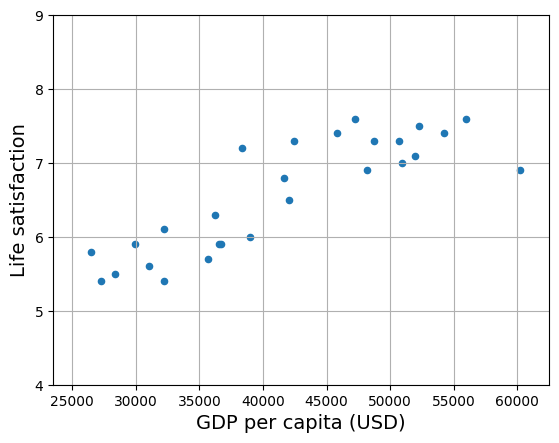

[[6.30165767]]
[[4.77590631]]


In [10]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction')

plt.axis([23_500, 62_500, 4, 9])
plt.show()

model = LinearRegression()
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]] # Cyprus GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

X_turkey = [[15_147.84]]
print(model.predict(X_turkey)) # outputs [[4.77590631]]

### My Example 1-1

In [18]:
from google.colab import files
uploaded = files.upload()

Saving average-years-of-schooling-vs-gdp-per-capita.csv to average-years-of-schooling-vs-gdp-per-capita.csv


[[4.77590631]]
θ₀ (intercept): [3.74904943]
θ₁ (slope): [[6.77889969e-05]]


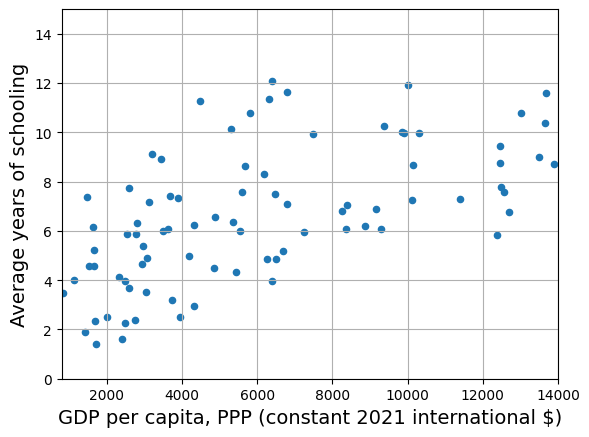

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import os


years_schooling = pd.read_csv('average-years-of-schooling-vs-gdp-per-capita.csv')
years_schooling_2023 = years_schooling[years_schooling['Year'] == 2023]

years_schooling_2023 = years_schooling_2023[['Entity', 'GDP per capita, PPP (constant 2021 international $)', 'Average years of schooling']].dropna()

X_years_schooling = years_schooling_2023[['GDP per capita, PPP (constant 2021 international $)']].values
y_years_schooling = years_schooling_2023[['Average years of schooling']].values

years_schooling_2023.plot(kind='scatter', grid=True, x='GDP per capita, PPP (constant 2021 international $)', y='Average years of schooling')

plt.axis([800, 14_000, 0, 15])

years_schooling_model = LinearRegression()

years_schooling_model.fit(X, y)

X_years_schooling_turkey = [[15_147.84]]
print(model.predict(X_years_schooling_turkey))

print("θ₀ (intercept):", years_schooling_model.intercept_) # 3.74904943
print("θ₁ (slope):", years_schooling_model.coef_) # 6.77889969e-05


Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two lines:

In [48]:

# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]

[[6.33333333]]


### Exercises
In this chapter we have covered some of the most important concepts in
machine learning. In the next chapters we will dive deeper and write more
code, but before we do, make sure you can answer the following questions:


1. How would you define machine learning?
- Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
2. Can you name four types of applications where it shines?
- No algorithmic solutions, replace long lists of hand-tuned rules, adapt to fluctuating environments, help humans learn
3. What is a labeled training set?
- Training set that contains the desired solution
4. What are the two most common supervised tasks?
- regression and classification
5. Can you name four common unsupervised tasks?
- Clustering, visualization, dimensionality reduction, and association rule learning.
6. What type of algorithm would you use to allow a robot to walk in
various unknown terrains?
- Reinforcement Learning
7. What type of algorithm would you use to segment your customers into
multiple groups?
- Clustering
8. Would you frame the problem of spam detection as a supervised
learning problem or an unsupervised learning problem?
- Supervised learning problem
9. What is an online learning system?
- It can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
10. What is out-of-core learning?
- It can handle vast quantities of data that cannot fit in a computer's main memory.
11. What type of algorithm relies on a similarity measure to make
predictions?
- It learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions (KNN).
12. What is the difference between a model parameter and a model
hyperparameter?
- A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
13. What do model-based algorithms search for? What is the most common
strategy they use to succeed? How do they make predictions?
- Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.
14. Can you name four of the main challenges in machine learning?
-  lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
15. If your model performs great on the training data but generalizes poorly
to new instances, what is happening? Can you name three possible
solutions?
- If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.
16. What is a test set, and why would you want to use it?
- A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
17. What is the purpose of a validation set?
- A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
18. What is the train-dev set, when do you need it, and how do you use it?
- The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.
19. What can go wrong if you tune hyperparameters using the test set?
- If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).